## Exercise 10

In [1]:
import interpolation 
import numpy as np
import scipy as sc
import scipy.stats as stats
from scipy.special import erf
import random as rd
import matplotlib.pyplot as plt
import math

def third_function_pdf(x,x0, sigma):
    numerator = np.exp(-np.power(x - x0, 2.) / (2 * sigma**2)) * (1/ (sigma*np.sqrt(2 * np.pi))) - np.exp(-np.power(x + x0, 2.)/ (2 * sigma**2)) * (1/ (sigma * np.sqrt(2 * np.pi)))
    return erf(x0/math.sqrt(2*sigma)) * numerator

In [2]:
pdf_object = interpolation.PDF()
utility = interpolation.Util()
x_gauss = np.linspace(-5, 5, 1000)
y_gauss = [pdf_object.gaussian_oned_pdf(a,0,1) for a in x_gauss]
gauss_generator = interpolation.LinearInterp(x_gauss, y_gauss, [-3,3])

x_third = np.linspace(0, 10, 500)
y_third = [third_function_pdf(a, 4, 1) for a in x_third]
third_generator = interpolation.LinearInterp(x_third, y_third,[0,10])

### Uniform Distribution

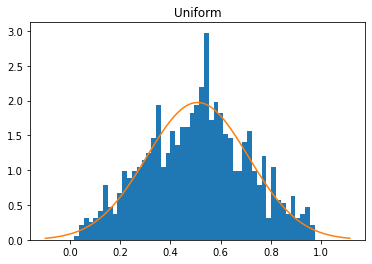

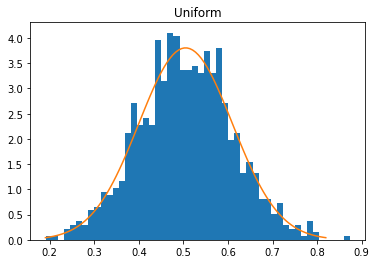

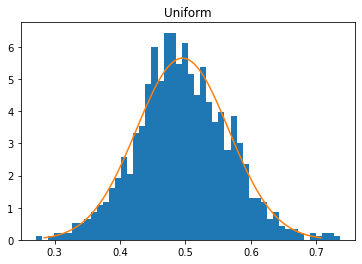

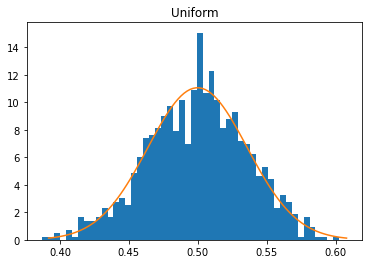

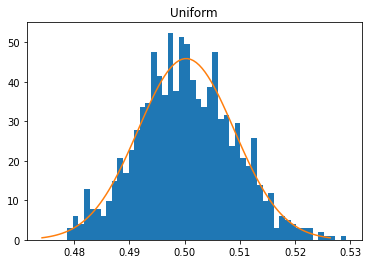

In [3]:
L_list = [2,8,16,64,1024]
for a in L_list:
    points_list = []
    for d in range(0,a):
        temporary_point_list = []
        for b in range(0,1000):
            temporary_point_list.append(rd.random())
        if d == 0:
            points_list = temporary_point_list
        else:
            points_list = [points_list[c] + temporary_point_list[c] for c in range(0,1000)]
    points_list= [f/a for f in points_list]
    mean = np.sum(points_list) / 1000
    sigma = math.sqrt(utility.var_function(points_list, mean))
    x_list = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
    plt.hist(points_list, bins=50, density=True)
    plt.plot(x_list, stats.norm.pdf(x_list, mean, sigma))
    plt.title('Uniform')
    plt.show()

### Gaussian Distribution

0.5045257471836497


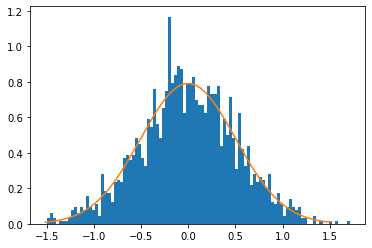

0.12393330982027502


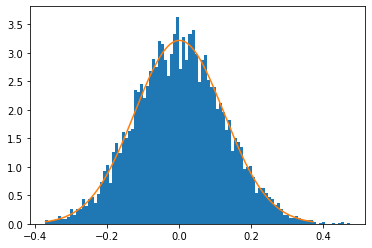

0.06298436047316194


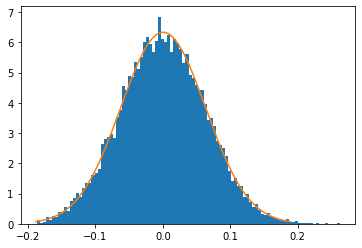

0.015472632700255567


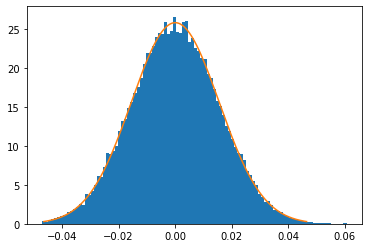

In [17]:
L_list = [2,8,16,64]
for a in L_list:
    for d in range(0,a):
        temporary_point_list = []
        for b in range(0,1000):
            new_point_gauss= gauss_generator.generate_random_point()
            temporary_point_list.append(new_point_gauss[0])
        if d == 0:
            points_list = temporary_point_list
        else:
            points_list = points_list + temporary_point_list
            
    points2_list= [f/a for f in points_list]
    mean = np.sum(points2_list) / len(points2_list)
    sigma = np.sqrt(np.sum((points2_list - mean)**2) / len(points2_list))
    print(sigma)
    x_list = np.linspace(mean - 3*sigma, mean + 3*sigma, 1000)
    plt.hist(points2_list, bins=100, density=True)
    plt.plot(x_list, stats.norm.pdf(x_list, mean, sigma))
     plt.title('1D-Gaussian')
    plt.show()

### Multivariate Gaussian

1.5952143588695222


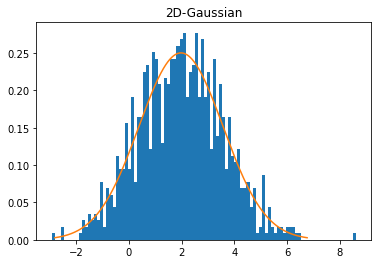

0.7627338517630877


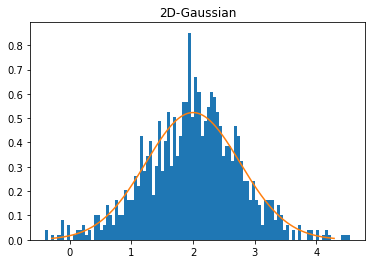

0.5468823095244811


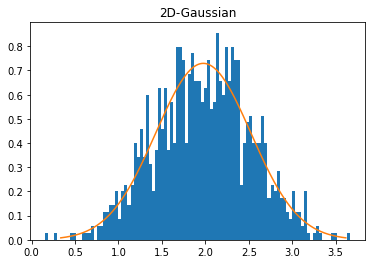

0.27567632502180445


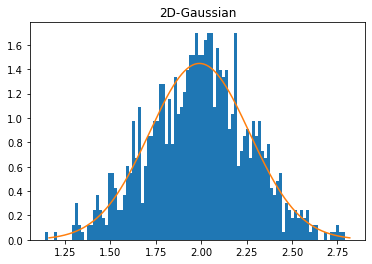

In [26]:
L_list = [2,8,16,64]
for a in L_list:
    for d in range(0,a):
        gaussian1 = np.random.normal(0,1,1000)
        gaussian2 = np.random.normal(2,2,1000)
        temporary_point_list = gaussian1 + gaussian2
        if d == 0:
            points_list = temporary_point_list
        else:
            points_list = points_list + temporary_point_list
            
    points2_list= [f/a for f in points_list]
    mean = np.sum(points2_list) / len(points2_list)
    sigma = np.sqrt(np.sum((points2_list - mean)**2) / len(points2_list))
    print(sigma)
    x_list = np.linspace(mean - 3*sigma, mean + 3*sigma, 1000)
    plt.hist(points2_list, bins=100, density=True)
    plt.plot(x_list, stats.norm.pdf(x_list, mean, sigma))
    plt.title('2D-Gaussian')
    plt.show()